In [1]:
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
sns.set_style('darkgrid')


In [2]:
rating_dt = pd.read_csv('ratings.csv')

In [3]:
tag_dt = pd.read_csv('tags.csv')
movie_dt = pd.read_csv('movies.csv')

In [4]:
print(tag_dt.head(5))
print(rating_dt.head(5))
print(movie_dt.head(5))

   userId  movieId           tag   timestamp
0      14      110          epic  1443148538
1      14      110      Medieval  1443148532
2      14      260        sci-fi  1442169410
3      14      260  space action  1442169421
4      14      318  imdb top 250  1442615195
   userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  

In [8]:
# rating has no na
# sum(rating_dt.rating.isna())
# rating histogram
rating = rating_dt.groupby(by="rating").size().to_frame('numRating').reset_index()
rating

,rating,numRating
0,0.5,442388
1,1.0,886233
2,1.5,441354
3,2.0,1850627
4,2.5,1373419
5,3.0,5515668
6,3.5,3404360
7,4.0,7394710
8,4.5,2373550
9,5.0,4071135


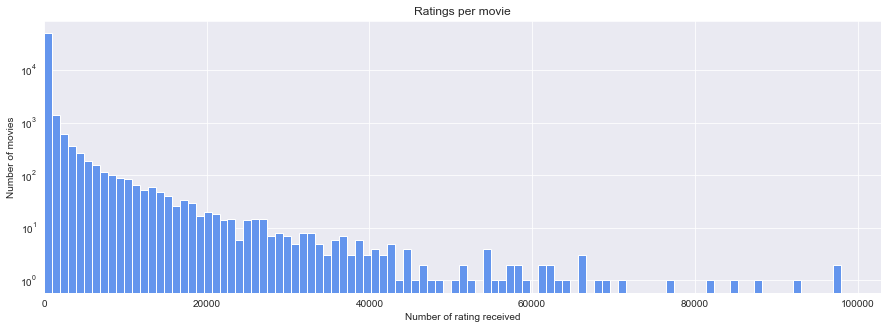

In [21]:
# rating per movie
subset = rating_dt.groupby(by="movieId").size().to_frame('numRating').reset_index()
dftmp = subset.sort_values(by=['numRating'], ascending = False)
plt.figure(figsize=(15,5))
plt.hist(dftmp.numRating, bins=100, color='cornflowerblue', log=True)
plt.title('Ratings per movie')
plt.xlabel('Number of rating received')
plt.ylabel('Number of movies')
plt.xlim(0,)
plt.show()

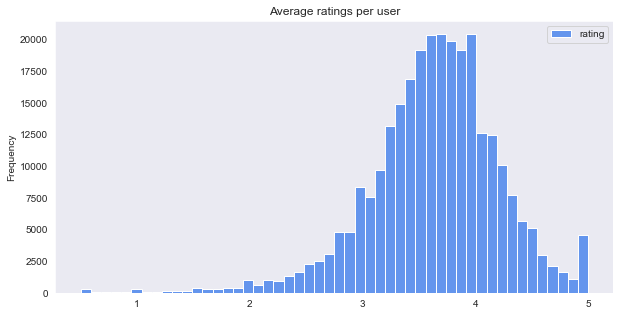

In [22]:
# average rating per user  
subset = rating_dt[['userId','rating']].groupby('userId').mean()
subset.plot(kind='hist', bins=50, grid=0, color='cornflowerblue', figsize=(10,5))
plt.title ('Average ratings per user')
plt.show()